### Research Question: Should travelers avoid airlines that have had crashes in the past ###
***Hypothesis***: The number of incidents, fatal accidents, and fatalities in 2000-2014 are correlated with the number of prior incidents, prior fatal accidents, and prior fatalities.\
***Null Hypothesis***: The number of incidents, fatal accidents, and fatalities in 2000-2014 are ***not*** correlated with the number of prior incidents, prior fatal accidents, and prior fatalities. 

We can start by looking at the data provided by the author ***Nate Silver***

Let's import all the required packages and we can import more as we go further

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
from scipy.stats import spearmanr
from scipy.stats import shapiro

C:\Users\brian\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Using pandas, we can look at the data and see what we are working with.

In [2]:
df = pd.read_csv('airline-safety.csv')

In [3]:
df.shape

(56, 8)

In [4]:
df.head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [5]:
print(df['airline'].unique())
print(len(df['airline'].unique()))

['Aer Lingus' 'Aeroflot*' 'Aerolineas Argentinas' 'Aeromexico*'
 'Air Canada' 'Air France' 'Air India*' 'Air New Zealand*'
 'Alaska Airlines*' 'Alitalia' 'All Nippon Airways' 'American*'
 'Austrian Airlines' 'Avianca' 'British Airways*' 'Cathay Pacific*'
 'China Airlines' 'Condor' 'COPA' 'Delta / Northwest*' 'Egyptair' 'El Al'
 'Ethiopian Airlines' 'Finnair' 'Garuda Indonesia' 'Gulf Air'
 'Hawaiian Airlines' 'Iberia' 'Japan Airlines' 'Kenya Airways' 'KLM*'
 'Korean Air' 'LAN Airlines' 'Lufthansa*' 'Malaysia Airlines'
 'Pakistan International' 'Philippine Airlines' 'Qantas*'
 'Royal Air Maroc' 'SAS*' 'Saudi Arabian' 'Singapore Airlines'
 'South African' 'Southwest Airlines' 'Sri Lankan / AirLanka' 'SWISS*'
 'TACA' 'TAM' 'TAP - Air Portugal' 'Thai Airways' 'Turkish Airlines'
 'United / Continental*' 'US Airways / America West*' 'Vietnam Airlines'
 'Virgin Atlantic' 'Xiamen Airlines']
56


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [7]:
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


# Analysis #
\
We can start by looking at the frequencies of each variables visually and compare 1985-1999 to 2000-2014.

<Figure size 432x288 with 0 Axes>

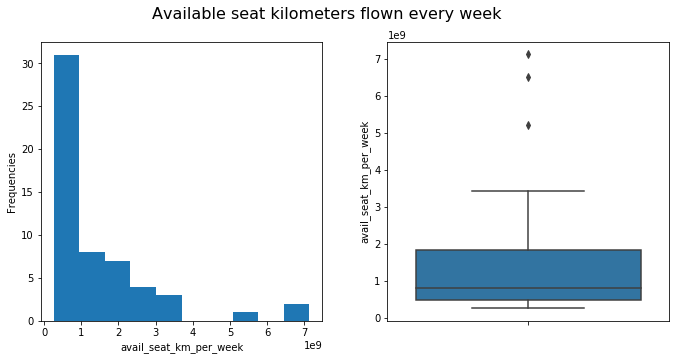

In [8]:
fig = plt.figure()
fig, ax = plt.subplots(1,2)

ax[0].hist(df['avail_seat_km_per_week'])
ax[0].set_xlabel('avail_seat_km_per_week')
ax[0].set_ylabel('Frequencies')

ax[1] = sns.boxplot(data=df,y='avail_seat_km_per_week')
ax[1].set_ylabel('avail_seat_km_per_week')

fig.suptitle('Available seat kilometers flown every week', fontsize=16,y=1.02)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

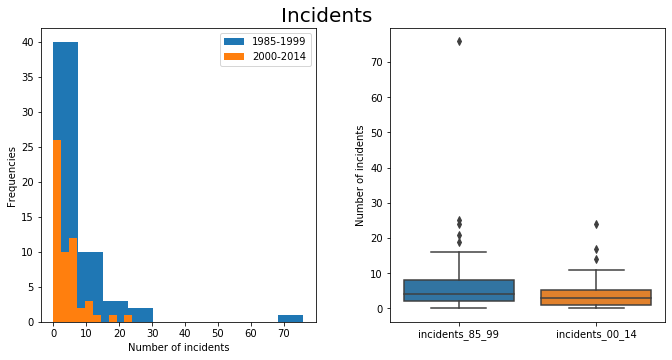

In [9]:
fig = plt.figure()
fig, ax = plt.subplots(1,2)

ax[0].hist(df['incidents_85_99'])
ax[0].hist(df['incidents_00_14'])
ax[0].set_xlabel('Number of incidents')
ax[0].set_ylabel('Frequencies')
ax[0].legend(['1985-1999','2000-2014'])

ax[1] = sns.boxplot(data=df[['incidents_85_99','incidents_00_14']])
ax[1].set_ylabel('Number of incidents')

fig.suptitle('Incidents', fontsize=20,y=1.02)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

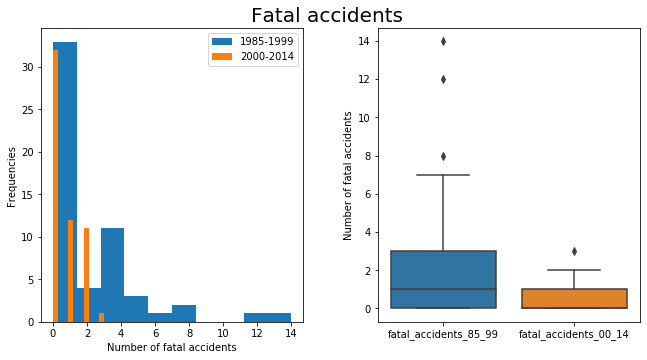

In [10]:
fig = plt.figure()
fig, ax = plt.subplots(1,2)

ax[0].hist(df['fatal_accidents_85_99'])
ax[0].hist(df['fatal_accidents_00_14'])
ax[0].set_xlabel('Number of fatal accidents')
ax[0].set_ylabel('Frequencies')
ax[0].legend(['1985-1999','2000-2014'])

ax[1] = sns.boxplot(data=df[['fatal_accidents_85_99','fatal_accidents_00_14']])
ax[1].set_ylabel('Number of fatal accidents')
fig.suptitle('Fatal accidents', fontsize=20,y=1.02)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

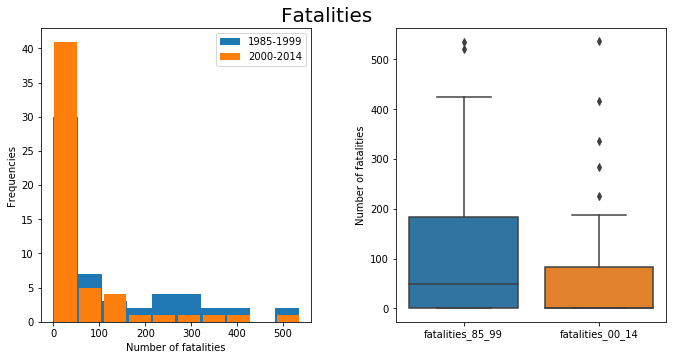

In [11]:
fig = plt.figure()
fig, ax = plt.subplots(1,2)

ax[0].hist(df['fatalities_85_99'])
ax[0].hist(df['fatalities_00_14'],rwidth=0.9)
ax[0].set_xlabel('Number of fatalities')
ax[0].set_ylabel('Frequencies')
ax[0].legend(['1985-1999','2000-2014'])

ax[1] = sns.boxplot(data=df[['fatalities_85_99','fatalities_00_14']])
ax[1].set_ylabel('Number of fatalities')
fig.suptitle('Fatalities', fontsize=20,y=1.02)
fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

In [26]:
print('Shapiro-Wilk test for incidents:')
res = shapiro(df['incidents_85_99'])
print('year 1985-1999: ')
print(res)
res = shapiro(df['incidents_00_14'])
print('year 2000-2014: ')
print(res)
print('\n')

print('Shapiro-Wilk test for fatal accidents:')
res = shapiro(df['fatal_accidents_85_99'])
print('year 1985-1999: ')
print(res)
res = shapiro(df['fatal_accidents_00_14'])
print('year 2000-2014: ')
print(res)
print('\n')

print('Shapiro-Wilk test for fatalities:')
res = shapiro(df['fatalities_85_99'])
print('year 1985-1999: ')
print(res)
res = shapiro(df['fatalities_00_14'])
print('year 2000-2014: ')
print(res)

Shapiro-Wilk test for incidents:
year 1985-1999: 
ShapiroResult(statistic=0.5236488580703735, pvalue=3.2660339276818773e-12)
year 2000-2014: 
ShapiroResult(statistic=0.783599853515625, pvalue=1.148026882447084e-07)


Shapiro-Wilk test for fatal accidents:
year 1985-1999: 
ShapiroResult(statistic=0.7308371067047119, pvalue=8.402712303734461e-09)
year 2000-2014: 
ShapiroResult(statistic=0.7344001531600952, pvalue=9.918069920900052e-09)


Shapiro-Wilk test for fatalities:
year 1985-1999: 
ShapiroResult(statistic=0.780465841293335, pvalue=9.726719696345754e-08)
year 2000-2014: 
ShapiroResult(statistic=0.5775762796401978, pvalue=1.9268045492459862e-11)


As shown above, all of the variables start highest at 0 and tails off as the number of incidents, accidents, and fatalities increase.  

In recent years (2000-2014), the incidents and fatal accidents are lower. However, the fatalities are consistent with older years.

Statistically, these histograms and box plots reveal that all of variables follow ***non-parametric statistics***, which normal t-tests and assumptions do not follow. This is proven by the Shapiro-Wilk test as well.

### Since we are dealing with non-parametric statistical properties, We will proceed to non-parametric tests, which include ***Wilcoxon's test and Spearman's test.*** ###

#### First, Wilcoxon's test will reveal whether prior incidents, fatal accidents, and fatalities are significantly higher than the recent incidents, fatal accidents, and fatalities regardless of airlines. ####

Here, we can observe the p-values of the old data (1985-1999) against the recent data (2000-2014), which will provide some answers.

***notes: Wilcoxon's critical values will stop at 50, which is close to n = 56. We can compare our number to n = 50***\
the critical value for the p-value = 0.05 is 434 at n = 50.

In [13]:
inci_test = wilcoxon(df['incidents_85_99'],df['incidents_00_14'], alternative='greater')
print('Wilcoxon\'s test for incidents in 1985-1999 to 2000-2014:')
inci_test

Wilcoxon's test for incidents in 1985-1999 to 2000-2014:


WilcoxonResult(statistic=822.5, pvalue=0.0009969415444020305)

Significant

In [14]:
fata_inc_test = wilcoxon(df['fatal_accidents_85_99'],df['fatal_accidents_00_14'], alternative='greater')
print('Wilcoxon\'s test for fatal accidents in 1985-1999 to 2000-2014:')
fata_inc_test

Wilcoxon's test for fatal accidents in 1985-1999 to 2000-2014:


WilcoxonResult(statistic=816.0, pvalue=1.619995564556264e-06)

Significant

In [15]:
fata_test = wilcoxon(df['fatalities_85_99'],df['fatalities_00_14'], alternative='greater')
print('Wilcoxon\'s test for fatalities in 1985-1999 to 2000-2014:')
fata_test

Wilcoxon's test for fatalities in 1985-1999 to 2000-2014:


WilcoxonResult(statistic=688.0, pvalue=0.004713903661953586)

Significant

By evaluating Wilcoxon's test with the one-tail method, all of these variables display ***significant p-values*** with ***extreme critical values*** regardless of the method, which is less than 0.5. 

***Furthermore, we can definitively say that despite airline, there are significantly less incidents, fatal accidents, and fatalities from 2000-2014 than in 85-99.***

This is likely due to improvement of safety measures, engineering, and technology in the field of airplanes.

With Spearman's test, we can look to see if correlations exist between prior and more recent incidents, fatal accidents, and fatalities. 

We can first test incidents, fatal accidents, and fatalities again available seat km per week. The assumption is that more available seak km per week, the more incidents and accidents will occur, which can be tested here. 

Spearman's test for available seat km per week vs. Incidents in 1985-1999:
SpearmanrResult(correlation=0.2768970506119699, pvalue=0.03883238989981136)

Spearman's test for available seat km per week vs. Incidents in 2000-2014:
SpearmanrResult(correlation=0.4610152365077956, pvalue=0.0003492168707661159)


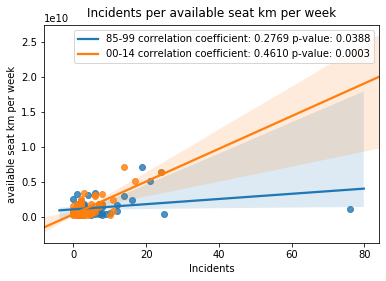

In [16]:
print('Spearman\'s test for available seat km per week vs. Incidents in 1985-1999:')
past = spearmanr(df['avail_seat_km_per_week'],df['incidents_85_99'])
print(past)
print('\nSpearman\'s test for available seat km per week vs. Incidents in 2000-2014:')
present = spearmanr(df['avail_seat_km_per_week'],df['incidents_00_14'])
print(present)
sns.regplot(x="incidents_85_99", y="avail_seat_km_per_week", data=df)
sns.regplot(x="incidents_00_14", y="avail_seat_km_per_week", data=df)
plt.xlabel('Incidents')
plt.ylabel('available seat km per week')
plt.legend(labels = ['85-99 correlation coefficient: ' + "{:.4f}".format(past[0]) + ' p-value: ' + "{:.4f}".format(past[1]),
                    '00-14 correlation coefficient: ' + "{:.4f}".format(present[0]) + ' p-value: ' + "{:.4f}".format(present[1])])
plt.title('Incidents per available seat km per week',y=1.01)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

Spearman's test for available seat km per week vs. fatal accidents in 1985-1999:
SpearmanrResult(correlation=0.2312847213319695, pvalue=0.08633064592072437)

Spearman's test for available seat km per week vs. fatal accidents in 2000-2014:
SpearmanrResult(correlation=0.16836863941914862, pvalue=0.21482166374654407)


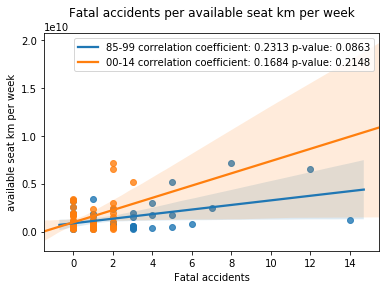

In [17]:
print('Spearman\'s test for available seat km per week vs. fatal accidents in 1985-1999:')
past = spearmanr(df['avail_seat_km_per_week'],df['fatal_accidents_85_99'])
print(past)

print('\nSpearman\'s test for available seat km per week vs. fatal accidents in 2000-2014:')
present = spearmanr(df['avail_seat_km_per_week'],df['fatal_accidents_00_14'])
print(present)
sns.regplot(x="fatal_accidents_85_99", y="avail_seat_km_per_week", data=df)
sns.regplot(x="fatal_accidents_00_14", y="avail_seat_km_per_week", data=df)
plt.xlabel('Fatal accidents')
plt.ylabel('available seat km per week')
plt.legend(labels = ['85-99 correlation coefficient: ' + "{:.4f}".format(past[0]) + ' p-value: ' + "{:.4f}".format(past[1]),
                    '00-14 correlation coefficient: ' + "{:.4f}".format(present[0]) + ' p-value: ' + "{:.4f}".format(present[1])])
plt.title('Fatal accidents per available seat km per week',y=1.05)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

Spearman's test for available seat km per week vs. fatalities in 1985-1999:
SpearmanrResult(correlation=0.1524883745339689, pvalue=0.2618803826788644)

Spearman's test for available seat km per week vs. fatalities in 2000-2014:
SpearmanrResult(correlation=0.1469859735595421, pvalue=0.2796889443103873)


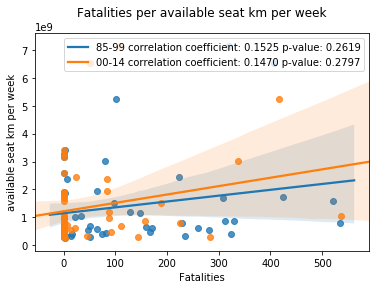

In [18]:
print('Spearman\'s test for available seat km per week vs. fatalities in 1985-1999:')
past = spearmanr(df['avail_seat_km_per_week'],df['fatalities_85_99'])
print(past)
print('\nSpearman\'s test for available seat km per week vs. fatalities in 2000-2014:')
present = spearmanr(df['avail_seat_km_per_week'],df['fatalities_00_14'])
print(present)
sns.regplot(x="fatalities_85_99", y="avail_seat_km_per_week", data=df)
sns.regplot(x="fatalities_00_14", y="avail_seat_km_per_week", data=df)
plt.xlabel('Fatalities')
plt.ylabel('available seat km per week')
plt.legend(labels = ['85-99 correlation coefficient: ' + "{:.4f}".format(past[0]) + ' p-value: ' + "{:.4f}".format(past[1]),
                    '00-14 correlation coefficient: ' + "{:.4f}".format(present[0]) + ' p-value: ' + "{:.4f}".format(present[1])])
plt.title('Fatalities per available seat km per week',y=1.05)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

Incidents in 2000-2014 are moderately correlated with available seat km per week ($\rho$ = 0.46), and this finding is significant (p-value = 0.003). However, incidents in 85-99 are weakly ($\rho$ = 0.28) correlated with available seats km per week, and this finding is significant (p-value = 0.04). 

Fatal accidents and fatalities in 85-99 and in 2000-2014 are not correlated with available seats km per week. 

Adjustment for available seats km per week may be needed when analyzing incidents, but not for analyzing fatal accidents or fatalities. 

# Cross correlation analysis #
***Notes***
High correlation: .5 to 1.\
Moderate correlation: .3 to .5.\
Low/small correlation: .29 and lower.


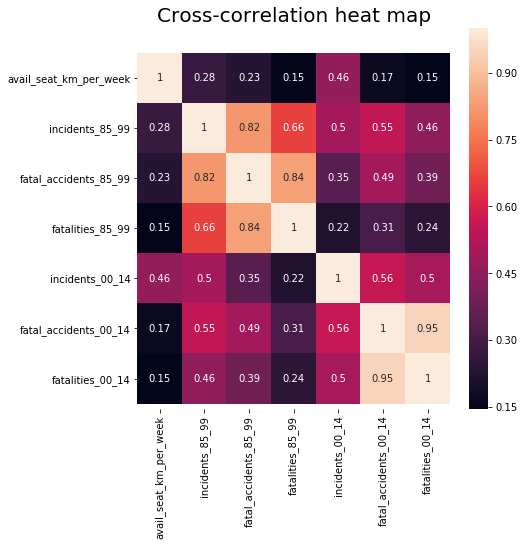

In [19]:
test = df.corr(method='spearman')

fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(test, annot=True)
ax.set_ylim(len(test)+0.1, -0.5)
ax.set_title('Cross-correlation heat map',fontsize=20)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

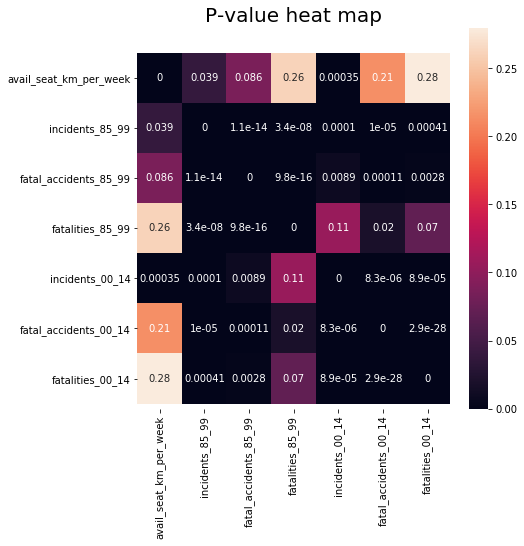

In [20]:
def cross_pvalue(df):
    rows,cols = df.shape
    p = np.ones(shape=(cols, cols))
    for i in range(cols):
        for j in range(cols):
            corr, pvalue = spearmanr(df.iloc[:,i], df.iloc[:,j])
            p[i, j] = p[j, i] = pvalue
    return p

mod_df = df.drop(columns=['airline'])
test = cross_pvalue(mod_df)

fig, ax = plt.subplots(figsize=(7,7)) 
labels = mod_df.columns
sns.heatmap(test, annot=True,xticklabels=labels, yticklabels=labels)
ax.set_ylim(len(test)+0.1, -0.5)
ax.set_title('P-value heat map',fontsize=20)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

### Summary of cross correlation analysis ###

The heatmap of cross-correlation reveals few points about the significance among each variables:

- Incidents in 2000-2014 are moderately correlated with prior incidents, prior fatal accidents, and available seats km per week. All of these correlations are statistically significant. 

- Fatal accidents in 2000-2014 are moderately correlated with prior incidents and prior fatal accidents. There is a low correlation between fatal accidents in 2000-2014 and prior fatalities. All of these correlations are statistically significant. 

- Fatalities in 2000-2014 are moderately correlated with prior incidents and prior fatal accidents, and these are statistically significant. There is a weak correlation between fatalities in 2000-2014 and prior fatalities, but this finding is not statistically significant. 


***Prior incidents and fatal accidents are correlated with 2000-2014 incidents, fatal accidents, and fatalities.*** 

Data visualization:

C:\Users\brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


<Figure size 432x288 with 0 Axes>

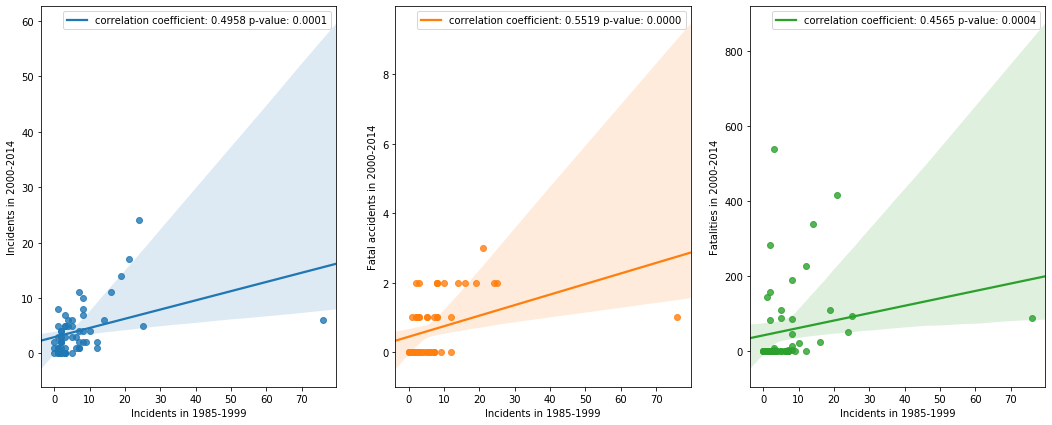

In [21]:
fig = plt.figure()
fig, ax = plt.subplots(1,3)

sns.regplot(x="incidents_85_99", y="incidents_00_14", data=df, ax=ax[0])
ax[0].set_xlabel('Incidents in 1985-1999')
ax[0].set_ylabel('Incidents in 2000-2014')
res = spearmanr(df['incidents_85_99'], df['incidents_00_14'])
ax[0].legend(['correlation coefficient: ' + "{:.4f}".format(res[0]) + ' p-value: ' + "{:.4f}".format(res[1])])

sns.regplot(x="incidents_85_99", y="fatal_accidents_00_14", data=df, ax=ax[1])
ax[1].set_xlabel('Incidents in 1985-1999')
ax[1].set_ylabel('Fatal accidents in 2000-2014')
res = spearmanr(df['incidents_85_99'], df['fatal_accidents_00_14'])
ax[1].legend(['correlation coefficient: ' + "{:.4f}".format(res[0]) + ' p-value: ' + "{:.4f}".format(res[1])])

sns.regplot(x="incidents_85_99", y="fatalities_00_14", data=df, ax=ax[2])
ax[2].set_xlabel('Incidents in 1985-1999')
ax[2].set_ylabel('Fatalities in 2000-2014')
res = spearmanr(df['incidents_85_99'], df['fatalities_00_14'])
ax[2].legend(['correlation coefficient: ' + "{:.4f}".format(res[0]) + ' p-value: ' + "{:.4f}".format(res[1])])

fig.tight_layout()
fig.set_figheight(7)
fig.set_figwidth(18)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

C:\Users\brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


<Figure size 432x288 with 0 Axes>

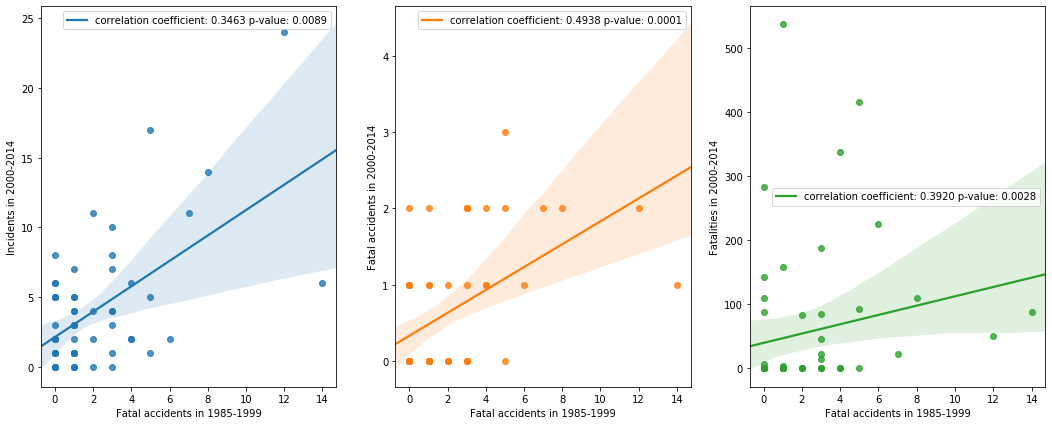

In [22]:
fig = plt.figure()
fig, ax = plt.subplots(1,3)

sns.regplot(x="fatal_accidents_85_99", y="incidents_00_14", data=df, ax=ax[0])
ax[0].set_xlabel('Fatal accidents in 1985-1999')
ax[0].set_ylabel('Incidents in 2000-2014')
res = spearmanr(df['fatal_accidents_85_99'], df['incidents_00_14'])
ax[0].legend(['correlation coefficient: ' + "{:.4f}".format(res[0]) + ' p-value: ' + "{:.4f}".format(res[1])])

sns.regplot(x="fatal_accidents_85_99", y="fatal_accidents_00_14", data=df, ax=ax[1])
ax[1].set_xlabel('Fatal accidents in 1985-1999')
ax[1].set_ylabel('Fatal accidents in 2000-2014')
res = spearmanr(df['fatal_accidents_85_99'], df['fatal_accidents_00_14'])
ax[1].legend(['correlation coefficient: ' + "{:.4f}".format(res[0]) + ' p-value: ' + "{:.4f}".format(res[1])])

sns.regplot(x="fatal_accidents_85_99", y="fatalities_00_14", data=df, ax=ax[2])
ax[2].set_xlabel('Fatal accidents in 1985-1999')
ax[2].set_ylabel('Fatalities in 2000-2014')
res = spearmanr(df['fatal_accidents_85_99'], df['fatalities_00_14'])
ax[2].legend(['correlation coefficient: ' + "{:.4f}".format(res[0]) + ' p-value: ' + "{:.4f}".format(res[1])])

fig.tight_layout()
fig.set_figheight(7)
fig.set_figwidth(18)

plt.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

## Summary ##

***As shown above, the prior incidents and fatal accidents are moderately correlated with recent incidents, fatal accidents, and fatalities!*** 

## Going back to the main question whether travelers should avoid airlines that have had crashes in the past: ##

It is not irrational for travelers to avoid airlines with troubled histories. There is correlation between prior crashes and more recent occurrences, but this correlation was only moderate. Keep in mind, this analysis cannot determine causality and does not use prediction modeling to advise on which airlines to avoid. 

Below, you can look at the airlines with lowest to highest number of prior incidents, fatal accidents, and fatalities.  

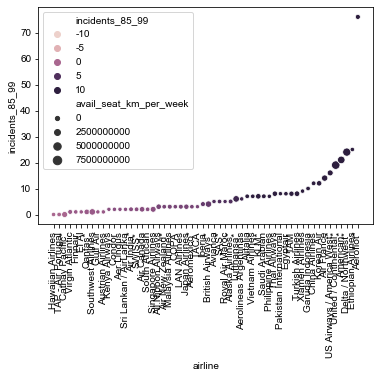

In [23]:
df = df.sort_values(by=['incidents_85_99'])

fig = plt.figure()
fig = sns.scatterplot(x='airline',y='incidents_85_99',data=df,hue='incidents_85_99',color='b',size='avail_seat_km_per_week',hue_norm=(-7, 7))
sns.set(rc={'figure.figsize':(13,5)})
#fig.set_figheight(5)
#fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.show()

fig = fig.get_figure()
fig.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

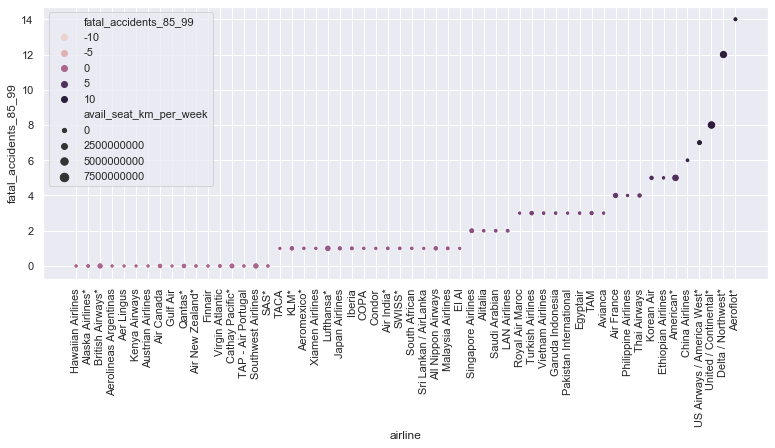

In [24]:
df = df.sort_values(by=['fatal_accidents_85_99'])

fig = plt.figure()
fig = sns.scatterplot(x='airline',y='fatal_accidents_85_99',data=df,hue='fatal_accidents_85_99',color='b',size='avail_seat_km_per_week',hue_norm=(-7, 7))
sns.set(rc={'figure.figsize':(13,5)})
#fig.set_figheight(5)
#fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.show()

fig = fig.get_figure()
fig.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')

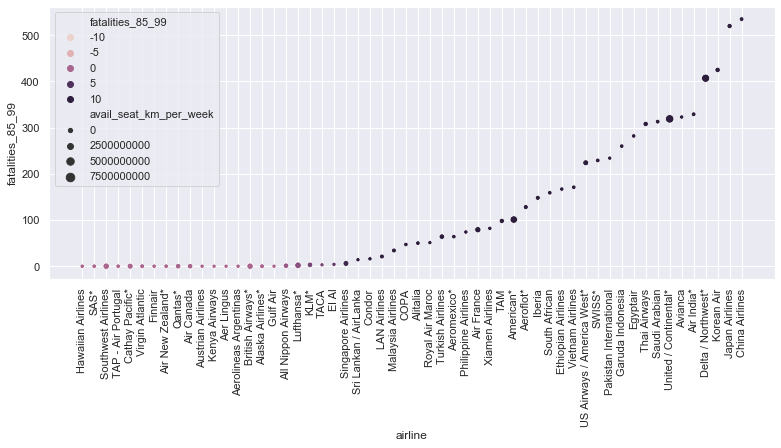

In [25]:
df = df.sort_values(by=['fatalities_85_99'])

fig = plt.figure()
fig = sns.scatterplot(x='airline',y='fatalities_85_99',data=df,hue='fatalities_85_99',color='b',size='avail_seat_km_per_week',hue_norm=(-7, 7))
sns.set(rc={'figure.figsize':(13,5)})
#fig.set_figheight(5)
#fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.show()

fig = fig.get_figure()
fig.savefig(r'C:\Users\brian\Downloads\fig.png',dpi=600, bbox_inches='tight')